In [1]:
from utils import Draw
from utils.DataLoader import Loader
from utils.OpeModel import OpeModel

from models.SpecNet import SpecCNN

In [2]:
classCount = 5
loader = Loader(classCount=classCount)
classes, train_loader, test_loader = loader.loader()

In [3]:
model = SpecCNN(classCount=classCount)
opemodel = OpeModel(model, 0.001, train_loader, test_loader)

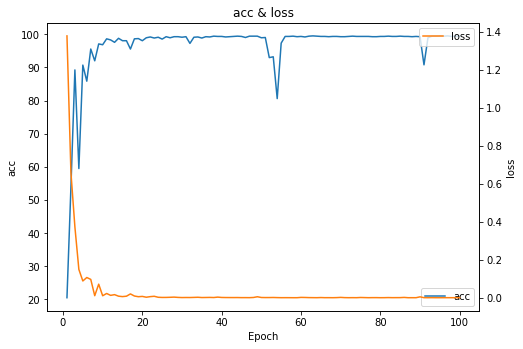

In [4]:
model_ini = model
opemodel.load_state('full', 99.43, 100, classCount)
model_fin, acc, loss = opemodel.get_state()
Draw.plot_loss_acc(acc, loss)
# Draw.plot_cfm(model, test_loader, classes)

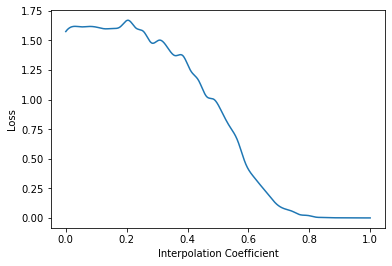

In [5]:
land = Draw.Landscape(1, model_ini, model_fin, train_loader)
land.draw()


In [6]:
# opemodel.train_strategy(100)
# opemodel.save_state('full', 100, 5)

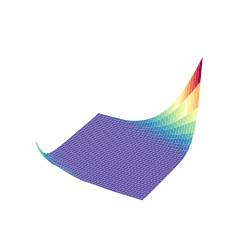

In [7]:
land.mode = 3
land.draw()